In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [15]:
X,y = sklearn.datasets.make_moons(200, noise = 0.15)

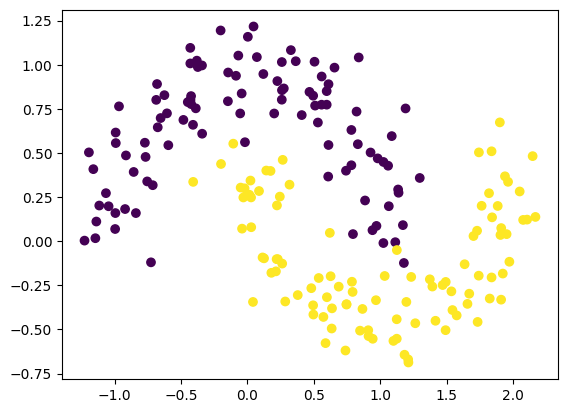

In [16]:
plt.scatter(X[:,0],X[:,1], c=y)

In [17]:
print(X.shape, y.shape)

(200, 2) (200,)


In [18]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [19]:
def retrieve(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [20]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return z1, a1, softmax

这段代码实现了一个前向传播函数，用于计算神经网络的输出。下面是对代码的逐行解释：

```python
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
```
定义了一个前向传播函数 `forward`，它接受输入数据 `x` 和模型参数字典 `model_dict`。首先从 `model_dict` 中提取权重和偏置参数。

```python
    z1 = X.dot(W1) + b1
```
计算隐藏层的线性组合 `z1`，即输入数据 `x` 与权重 `W1` 的点积加上偏置 `b1`。

```python
    a1 = np.tanh(z1)
```
对 `z1` 应用双曲正切激活函数，得到隐藏层的激活值 `a1`。

```python
    z2 = a1.dot(W2) + b2
```
计算输出层的线性组合 `z2`，即隐藏层激活值 `a1` 与权重 `W2` 的点积加上偏置 `b2`。

```python
    exp_scores = np.exp(z2)
```
对 `z2` 应用指数函数，得到未归一化的分数 `exp_scores`。

```python
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
```
对 `exp_scores` 进行归一化，得到输出层的概率分布 `softmax`。

```python
    return z1, a1, softmax
```
返回隐藏层的线性组合 `z1`、隐藏层的激活值 `a1` 和输出层的概率分布 `softmax`。

### 代码优化建议
1. `retreive` 函数名拼写错误，应为 `retrieve`。
2. 输入数据变量名 `X` 应为 `x`，以保持一致性。

优化后的代码如下：

```python
def forward(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return z1, a1, softmax
```

### 语法检查
1. 确保 `retrieve` 函数已定义或导入。
2. 确保输入数据 `x` 和模型参数字典 `model_dict` 格式正确。

### 代码解释（中文）
这段代码实现了一个前向传播函数，用于计算神经网络的输出。首先从模型参数字典中提取权重和偏置参数，然后计算隐藏层的线性组合和激活值，接着计算输出层的线性组合和概率分布，最后返回这些值。

In [21]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

这段代码实现了一个损失函数，用于计算神经网络的损失值。下面是对代码的逐行解释：

```python
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
```
定义了一个损失函数 `loss`，它接受输出层的概率分布 `softmax`，标签 `y` 和模型参数字典 `model_dict`。首先从 `model_dict` 中提取权重和偏置参数。

```python
    m = np.zeros(200)
```
初始化一个长度为200的零数组 `m`，用于存储每个样本的预测概率。

```python
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
```
遍历标签 `y`，对于每个样本，获取其对应的预测概率，并存储在数组 `m` 中。

```python
    log_prob = -np.log(m)
```
计算每个样本的对数概率 `log_prob`。

```python
    loss = np.sum(log_prob)
```
计算所有样本的对数概率之和，得到初始损失值 `loss`。

```python
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
```
计算正则化损失 `reg_loss`，以防止过拟合。

```python
    loss += reg_loss
```
将正则化损失加到初始损失值上。

```python
    return float(loss / y.shape[0])
```
返回平均损失值。

### 代码优化建议
1. `retreive` 函数名拼写错误，应为 `retrieve`。
2. `lambda_reg` 变量未定义，应在函数参数中传入或在函数内部定义。
3. 初始化数组 `m` 的长度应为 `y.shape[0]`，而不是固定的200。
4. 可以使用向量化操作来替代循环，提高代码效率。

优化后的代码如下：

```python
def loss(softmax, y, model_dict, lambda_reg):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(y.shape[0])
    m = softmax[range(y.shape[0]), y]
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss += reg_loss
    return float(loss / y.shape[0])
```

### 语法检查
1. 确保 `retrieve` 函数已定义或导入。
2. 确保 `lambda_reg` 变量已定义或传入。

### 代码解释（中文）
这段代码实现了一个损失函数，用于计算神经网络的损失值。首先从模型参数字典中提取权重和偏置参数，然后计算每个样本的预测概率和对数概率，接着计算所有样本的对数概率之和，得到初始损失值。然后计算正则化损失，并将其加到初始损失值上，最后返回平均损失值。

In [22]:
def predict(model_dict, x):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1)    # (200,)

这段代码实现了一个预测函数，用于根据输入数据和模型参数进行预测。下面是对代码的逐行解释：

```python
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
```
定义了一个预测函数 `predict`，它接受模型参数字典 `model_dict` 和输入数据 `x`。首先从 `model_dict` 中提取权重和偏置参数。

```python
    z1 = x.dot(W1) + b1
```
计算隐藏层的线性组合 `z1`，即输入数据 `x` 与权重 `W1` 的点积加上偏置 `b1`。

```python
    a1 = np.tanh(z1)
```
对 `z1` 应用双曲正切激活函数，得到隐藏层的激活值 `a1`。

```python
    z2 = a1.dot(W2) + b2
```
计算输出层的线性组合 `z2`，即隐藏层激活值 `a1` 与权重 `W2` 的点积加上偏置 `b2`。

```python
    exp_scores = np.exp(z2)
```
对 `z2` 应用指数函数，得到未归一化的分数 `exp_scores`。

```python
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   # (200,2)
```
对 `exp_scores` 进行归一化，得到输出层的概率分布 `softmax`。

```python
    return np.argmax(softmax, axis=1)    # (200,)
```
返回每个样本的预测类别，即概率最大的类别索引。

### 代码优化建议
1. `retreive` 函数名拼写错误，应为 `retrieve`。
2. 确保输入数据 `x` 和模型参数字典 `model_dict` 格式正确。

优化后的代码如下：

```python
def predict(model_dict, x):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(softmax, axis=1)
```

### 语法检查
1. 确保 `retrieve` 函数已定义或导入。
2. 确保输入数据 `x` 和模型参数字典 `model_dict` 格式正确。

### 代码解释（中文）
这段代码实现了一个预测函数，用于根据输入数据和模型参数进行预测。首先从模型参数字典中提取权重和偏置参数，然后计算隐藏层的线性组合和激活值，接着计算输出层的线性组合和概率分布，最后返回每个样本的预测类别，即概率最大的类别索引。

### Equations for Backprop

![backprop](https://user-images.githubusercontent.com/30661597/67566804-3e405980-f75b-11e9-9e19-f3c388745c0a.png)

## $\frac{\partial L}{\partial y_{1}}=-\tilde{y}_{1}\left[\frac{\left(y_{1}\right)^{\prime}}{y_{1}}\right]=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]$

## $\frac{\partial y_{1}}{\partial z_{1}}=\frac{\partial}{\partial z_{1}} \cdot \frac{e^{z_{1}}}{e^{z_{1}}+e^{z_{2}}+e^{z_{3}}}$

![der](https://user-images.githubusercontent.com/46392773/56460220-ec94cc00-63d1-11e9-91d1-b4e3c57c81fd.png)


## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]\frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{y_{1}\left(1-y_{1}\right)}{y_{1}}\right]=-\tilde{y}_{1}\left(1-y_{1}\right)$

Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:

## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}} = -1(1-y_{1}) = y_{1} - 1 = \delta_{3}$

## $\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}$

## $\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}$

## $\frac{\partial L}{\partial b_{2}}=\delta_{3}$

## $\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2$

## $\frac{\partial L}{\partial b_{1}}=\delta 2$

### 总结

这段详细解释了反向传播算法的数学原理和公式。反向传播算法用于计算神经网络中每个权重的梯度，从而更新权重以最小化损失函数。文中详细介绍了如何使用链式法则计算损失函数相对于每个权重的导数，并展示了具体的公式和步骤。

### 重要信息提取

1. **反向传播算法**：
   - 用于计算神经网络中每个权重的梯度。
   - 通过最小化损失函数来更新权重。

2. **链式法则**：
   - 计算损失函数相对于每个权重的导数。
   - 包括三个主要步骤：损失相对于输出的导数、输出相对于净输入的导数、净输入相对于权重的导数。

3. **公式和步骤**：
   - 计算损失相对于输出的导数。
   - 计算输出相对于净输入的导数。
   - 计算净输入相对于权重的导数。
   - 使用这些导数更新权重。

### 详细解释
1. **公式和步骤**：
   - **损失相对于输出的导数**：
     - 计算损失函数相对于输出的导数。
     - 使用乘积法则计算导数。
   - **输出相对于净输入的导数**：
     - 计算输出相对于净输入的导数。
     - 使用softmax函数的导数公式。
   - **净输入相对于权重的导数**：
     - 计算净输入相对于权重的导数。
     - 使用输入和权重的关系公式。
   - **更新权重**：
     - 使用计算得到的梯度更新权重。
  

https://www.latexlive.com/## 公式转化网站

这些图片展示了反向传播算法（Backpropagation）的推导过程，特别是用于神经网络的梯度计算。以下是对这些公式推导的解释：

1. **损失函数 \(L\)**:
   \[
   L = -\sum_i \tilde{y}_i \log(y_i)
   \]
   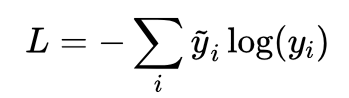
   这是交叉熵损失函数，用于衡量预测值 \(y_i\) 和真实标签 \(\tilde{y}_i\) 之间的差异。

2. **输出层的激活函数 \(y_1\)**:
   \[
   y_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2}}
   \]
   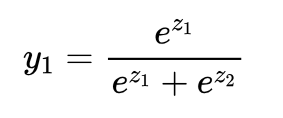
   这是 softmax 函数的一部分，用于将网络的输出转换为概率分布。

3. **隐藏层的线性组合 \(z_1\)**:
   \[
   z_1 = a_1 w_7 + a_2 w_9 + a_3 w_{11}
   \]
   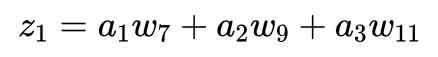
   这是隐藏层神经元的线性组合，\(a_1, a_2, a_3\) 是输入层的激活值，\(w_7, w_9, w_{11}\) 是权重。

4. **损失函数对输出层激活值的偏导数**:
   \[
   \frac{\partial L}{\partial y_1} = -\tilde{y}_1 \left( \frac{1}{y_1} \right) = -\tilde{y}_1 \left( \frac{1}{y_1} \right)
   \]
   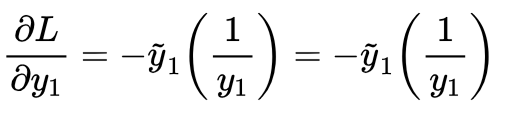
   这是损失函数对输出层激活值的偏导数。

5. **输出层激活值对线性组合的偏导数**:
   \[
   \frac{\partial y_1}{\partial z_1} = \frac{\partial}{\partial z_1} \left( \frac{e^{z_1}}{e^{z_1} + e^{z_2}} \right)
   \]
   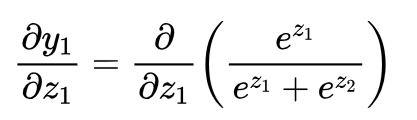
   通过链式法则和商的求导法则，可以得到：
   \[
   \frac{\partial y_1}{\partial z_1} = y_1 (1 - y_1)
   \]
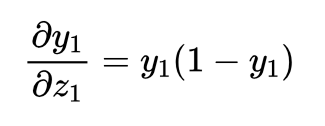
6. **损失函数对线性组合的偏导数**:
   \[
   \frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial y_1} \cdot \frac{\partial y_1}{\partial z_1} = -\tilde{y}_1 (1 - y_1)
   \]
   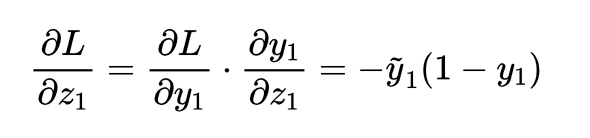
   如果真实标签 \(\tilde{y}_1 = 1\)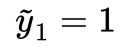，则：
   \[
   \frac{\partial L}{\partial z_1} = y_1 - 1 = \delta_3
   \]
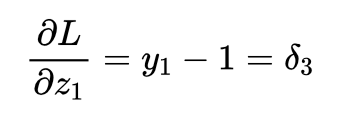
7. **隐藏层的误差项 \(\delta_2\)**:
   \[
   \delta_2 = (1 - \tanh^2(z_1)) \odot \delta_3 W_2^T
   \]
   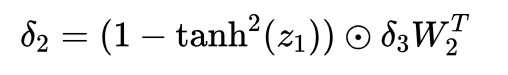
   这是通过链式法则计算的隐藏层的误差项。

8. **权重和偏置的梯度**:
   \[
   \frac{\partial L}{\partial W_2} = a_1^T \delta_3
   \]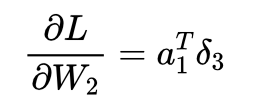
   \[
   \frac{\partial L}{\partial b_2} = \delta_3
   \]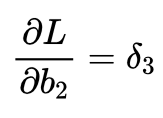
   \[
   \frac{\partial L}{\partial W_1} = x^T \delta_2
   \]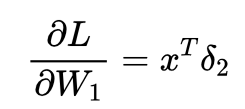
   \[
   \frac{\partial L}{\partial b_1} = \delta_2
   \]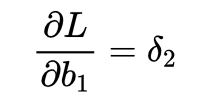

这些公式展示了如何通过反向传播算法计算神经网络中每个参数的梯度，从而更新参数以最小化损失函数。

###交叉熵损失函数（Cross-Entropy Loss

  通常用于分类问题中的损失计算。让我们逐步解析这个公式：
  [ L = -\sum_i \tilde{y}_i \log(y_i) ]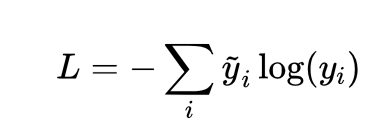
  1. ( L ): 这是损失值（Loss），我们希望通过训练模型来最小化这个值。
  2. (\sum_i): 这是对所有样本 (i) 进行求和。
  3. (\tilde{y}_i): 这是样本 (i) 的真实标签（通常是one-hot编码的向量）。
  4. (y_i): 这是模型对样本 (i) 的预测概率（通常是通过softmax函数得到的概率分布）。

  具体来说，交叉熵损失函数衡量的是真实标签分布 (\tilde{y}_i) 和预测概率分布 (y_i) 之间的差异。公式中的对数函数 (\log(y_i)) 用于计算预测概率的对数值，然后乘以真实标签 (\tilde{y}_i)，最后对所有样本求和并取负值。

  在分类问题中，交叉熵损失函数的作用是当预测概率 (y_i) 越接近真实标签 (\tilde{y}_i) 时，损失值 (L) 越小，从而指导模型参数的更新，使得模型的预测结果越来越准确。

  举个例子，假设我们有一个二分类问题，真实标签 (\tilde{y}) 是 [1, 0]（表示第一个类别），模型预测的概率 (y) 是 [0.8, 0.2]，那么交叉熵损失计算如下：

  [ L = - (1 \cdot \log(0.8) + 0 \cdot \log(0.2)) = - \log(0.8) ]

  通过最小化这个损失值，模型会调整参数，使得预测概率 (y) 更加接近真实标签 (\tilde{y})。

In [23]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2) delta3 = probs -1, here probs is the expected value of class
        dW2 = (a1.T).dot(delta3)               # a1:(3,200) dot (200,2) =  (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)  delta three is for all examples,all the 200 examples,here we were performing a dot product,but for db2, we don't have any dot product.So we need to sum across all the examples
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2) # see below picture
        dW1 += lambda_reg * np.sum(W1)
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))

    return model_dict

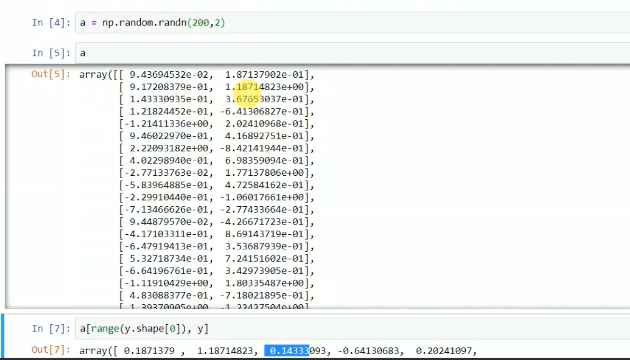
y就是正确结果0,1的 所以 y 就是去提取对的那个值

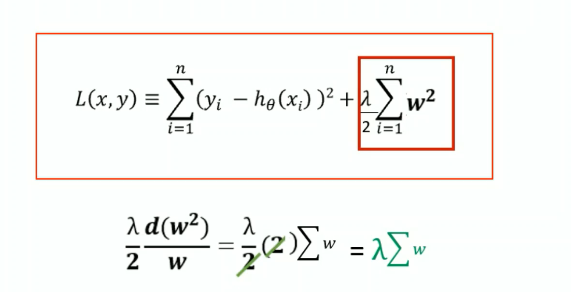
这就是 L2 正则化的推导。

因此我们有 lambda 除以 2

与权重平方和。

这段代码实现了一个简单的反向传播算法，用于训练一个两层神经网络。下面是对代码的逐行解释：

```python
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
```
定义了一个反向传播函数 `backpropagation`，它接受输入数据 `x`，标签 `y`，模型参数字典 `model_dict` 和训练轮数 `epochs`。在每一轮训练中，首先从 `model_dict` 中提取权重和偏置参数。

```python
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
```
调用前向传播函数 `forward`，计算隐藏层的激活值 `a1` 和输出层的概率 `probs`。

```python
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2) delta3 = probs -1, here probs is the expected value of class
```
计算输出层的误差 `delta3`，即预测值 `probs` 减去实际值。

```python
        dW2 = (a1.T).dot(delta3)               # a1:(3,200) dot (200,2) =  (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)  delta three is for all examples,all the 200 examples,here we were performing a dot product,but for db2, we don't have any dot product.So we need to sum across all the examples
```
计算输出层的权重梯度 `dW2` 和偏置梯度 `db2`。

```python
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
```
计算隐藏层的误差 `delta2`，以及隐藏层的权重梯度 `dW1` 和偏置梯度 `db1`。

```python
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2) # see below picture
        dW1 += lambda_reg * np.sum(W1)
```
添加正则化项，以防止过拟合。

```python
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
```
使用梯度下降法更新权重和偏置。

```python
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
```
更新模型参数字典。

```python
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
```
每50轮打印一次损失值。

```python
    return model_dict
```
返回更新后的模型参数字典。

### 代码优化建议
1. `retreive` 函数名拼写错误，应为 `retrieve`。
2. 正则化项的计算应使用 `np.sum(W2**2)` 而不是 `np.sum(W2)`，同理 `W1` 也是如此。
3. `lambda_reg` 和 `learning_rate` 变量未定义，应在函数参数中传入或在函数内部定义。
4. `loss` 函数未定义，应确保在代码中定义或导入。

优化后的代码如下：

```python
def backpropagation(x, y, model_dict, epochs, learning_rate, lambda_reg):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        dW2 += lambda_reg * np.sum(W2**2)
        dW1 += lambda_reg * np.sum(W1**2)
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        if i % 50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i, loss(probs, y, model_dict)))
    return model_dict
```

In [24]:
# Define Initial Weights
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim) #那么还记得 Xavier 初始化的作用是什么吗？它将权重矩阵除以输入神经元的平方根，输入神经元的数量。所以，我们要用平方根除它。
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model

这段代码实现了一个初始化神经网络权重的函数。下面是对代码的逐行解释：

```python
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
```
定义了一个初始化网络的函数 `init_network`，它接受输入层维度 `input_dim`，隐藏层维度 `hidden_dim` 和输出层维度 `output_dim`。首先创建一个空字典 `model`，用于存储网络的权重和偏置。

```python
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
```
使用 Xavier 初始化方法来初始化权重 `W1` 和 `W2`，并将偏置 `b1` 和 `b2` 初始化为零。Xavier 初始化方法通过将权重除以输入维度的平方根来保持输入和输出的方差一致，从而有助于加速收敛。

```python
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
```
将初始化的权重和偏置存储在字典 `model` 中。

```python
    return model
```
返回包含初始化权重和偏置的字典 `model`。

### 代码优化建议
1. 代码已经相对简洁和高效，没有明显的优化空间。
2. 可以添加一些注释来解释 Xavier 初始化的原理。

优化后的代码如下：

```python
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model
```

### 代码解释（中文）
这段代码实现了一个初始化神经网络权重的函数。首先创建一个空字典 `model`，用于存储网络的权重和偏置。然后使用 Xavier 初始化方法来初始化权重 `W1` 和 `W2`，并将偏置 `b1` 和 `b2` 初始化为零。最后将初始化的权重和偏置存储在字典 `model` 中，并返回该字典。

In [25]:
def plot_decision_boundary(pred_func):
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary for hidden layer size 3")

这段代码实现了一个绘制决策边界的函数，用于可视化分类模型的决策边界。下面是对代码的逐行解释：

```python
def plot_decision_boundary(pred_func):
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
```
定义了一个绘制决策边界的函数 `plot_decision_boundary`，它接受一个预测函数 `pred_func` 作为参数。注释部分说明了代码的来源。

```python
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
```
设置绘图区域的最小值和最大值，并在其基础上添加一些填充。`X` 是输入数据，`X[:, 0]` 表示第一个特征，`X[:, 1]` 表示第二个特征。

```python
    h = 0.01
```
设置网格点之间的距离 `h`。

```python
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
```
生成一个网格点矩阵，网格点之间的距离为 `h`。

```python
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
```
对网格点矩阵中的每个点进行预测，并将预测结果 `Z` 重新调整为与网格点矩阵相同的形状。

```python
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary for hidden layer size 3")
```
绘制决策边界的等高线图，并绘制训练数据点。`plt.contourf` 用于绘制等高线图，`plt.scatter` 用于绘制散点图。

### 代码优化建议
1. 确保 `X` 和 `y` 是全局变量或在函数内部传入。
2. 可以将标题作为参数传入，以提高函数的通用性。

优化后的代码如下：

```python
def plot_decision_boundary(pred_func, X, y, title="Decision Boundary"):
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
```

### 代码解释（中文）
这段代码实现了一个绘制决策边界的函数，用于可视化分类模型的决策边界。首先设置绘图区域的最小值和最大值，并在其基础上添加一些填充。然后生成一个网格点矩阵，并对网格点矩阵中的每个点进行预测。接着将预测结果重新调整为与网格点矩阵相同的形状，最后绘制决策边界的等高线图和训练数据点。

Loss at epoch 0 is: 0.627
Loss at epoch 50 is: 0.397
Loss at epoch 100 is: 0.319
Loss at epoch 150 is: 0.307
Loss at epoch 200 is: 0.305
Loss at epoch 250 is: 0.304
Loss at epoch 300 is: 0.304
Loss at epoch 350 is: 0.304
Loss at epoch 400 is: 0.303
Loss at epoch 450 is: 0.303
Loss at epoch 500 is: 0.303
Loss at epoch 550 is: 0.302
Loss at epoch 600 is: 0.302
Loss at epoch 650 is: 0.302
Loss at epoch 700 is: 0.302
Loss at epoch 750 is: 0.301
Loss at epoch 800 is: 0.301
Loss at epoch 850 is: 0.301
Loss at epoch 900 is: 0.301
Loss at epoch 950 is: 0.301


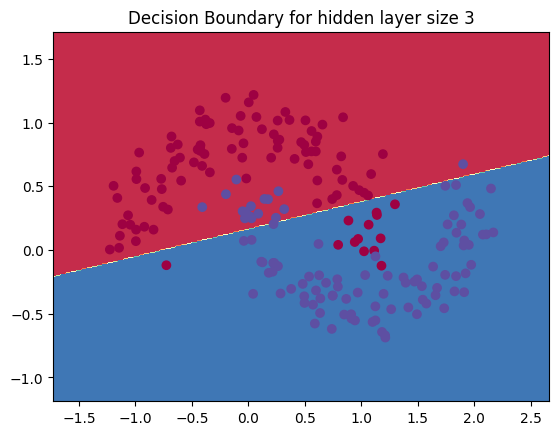

In [26]:
# Now Let's start the action
model_dict = init_network(input_dim = input_neurons , hidden_dim = 3, output_dim = output_neurons)
model = backpropagation(X, y, model_dict, 1000)
plot_decision_boundary(lambda x: predict(model, x))

这段代码展示了如何初始化神经网络、进行反向传播训练以及绘制决策边界。下面是对代码的逐行解释：

```python
# Now Let's start the action
model_dict = init_network(input_dim=input_neurons, hidden_dim=3, output_dim=output_neurons)
```
首先，调用 `init_network` 函数初始化神经网络的权重和偏置。`input_dim`、`hidden_dim` 和 `output_dim` 分别表示输入层、隐藏层和输出层的神经元数量。初始化后的模型参数存储在 `model_dict` 字典中。

```python
model = backpropagation(X, y, model_dict, 1000)
```
然后，调用 `backpropagation` 函数进行反向传播训练。`X` 是输入数据，`y` 是标签，`model_dict` 是初始化后的模型参数，`1000` 是训练的轮数。训练后的模型参数存储在 `model` 字典中。

```python
plot_decision_boundary(lambda x: predict(model, x))
```
最后，调用 `plot_decision_boundary` 函数绘制决策边界。使用 `lambda` 表达式将 `predict` 函数包装为一个接受输入数据 `x` 并返回预测结果的函数。